In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from statsmodels.multivariate.pca import PCA
from scipy.stats import chi2

In [366]:
os.getcwd()

'/Users/ishan/Desktop/UCB Classes/Term 1/230E'

In [367]:
os.chdir(r'/Users/ishan/Desktop/UCB Classes/Term 1/230E')

### Part (1)

In [368]:
characteristics = pd.read_csv('PS7_LP_Portfolios.csv',nrows=1,header=None).dropna(axis=1).values[0]
labels = pd.unique(pd.read_csv('PS7_LP_Portfolios.csv',nrows=1,skiprows=1,header=None,index_col=0).values[0])
headers = [i+'_'+j for i in characteristics for j in labels]

dset = pd.read_csv('PS7_LP_Portfolios.csv',skiprows=2,index_col=0,names=headers)

In [369]:
dset.describe()

,accruals_p1,accruals_p2,accruals_p3,accruals_p4,accruals_p5,accruals_p6,accruals_p7,accruals_p8,accruals_p9,accruals_p10,...,valueem_p1,valueem_p2,valueem_p3,valueem_p4,valueem_p5,valueem_p6,valueem_p7,valueem_p8,valueem_p9,valueem_p10
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.006952,0.008742,0.007939,0.009199,0.009507,0.010050,0.009967,0.009278,0.011210,0.010449,...,0.009038,0.008827,0.008748,0.008512,0.009472,0.009271,0.010549,0.010091,0.013394,0.013066
std,0.060943,0.053013,0.047733,0.043845,0.041945,0.042262,0.040713,0.043707,0.050436,0.058626,...,0.050547,0.047003,0.046257,0.045487,0.045736,0.045760,0.045804,0.045272,0.052423,0.069871
min,-0.299212,-0.255379,-0.266361,-0.204603,-0.199828,-0.190490,-0.197702,-0.231356,-0.224476,-0.234199,...,-0.240049,-0.251962,-0.262355,-0.212433,-0.230874,-0.239460,-0.241726,-0.208158,-0.244705,-0.268233
25%,-0.028145,-0.019822,-0.020314,-0.016464,-0.015578,-0.013898,-0.012822,-0.014122,-0.016207,-0.021946,...,-0.018591,-0.017154,-0.017803,-0.018280,-0.017202,-0.014698,-0.012999,-0.012933,-0.017717,-0.021833
50%,0.010465,0.008654,0.010230,0.010335,0.011235,0.011022,0.012719,0.010135,0.014597,0.012550,...,0.010808,0.009075,0.010247,0.010585,0.011185,0.011922,0.010354,0.012526,0.013268,0.010627
75%,0.044546,0.040514,0.035922,0.037338,0.035250,0.035714,0.033898,0.035920,0.042735,0.045749,...,0.040427,0.038618,0.036830,0.034871,0.037036,0.036227,0.036829,0.034034,0.039722,0.044051
max,0.189380,0.237015,0.204743,0.158861,0.181234,0.154861,0.157141,0.190812,0.191213,0.212904,...,0.213952,0.183829,0.146968,0.194581,0.204306,0.245696,0.257147,0.262622,0.355632,0.603360


1. Means for the excess returns range from 0.0022 to 0.0167
2. Standard Deviations for the excess returns range from 0.035 to 0.085

### Part (2)

In [370]:
famafench_3f = pd.read_csv('F-F_Research_Data_Factors.CSV',index_col=0,skiprows=3,engine='python',skipfooter=101)
famafench_5f = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv',index_col=0,skiprows=3,engine='python',skipfooter=62)

In [371]:
famafench_3f=famafench_3f.iloc[famafench_3f.index.get_loc(196311):famafench_3f.index.get_loc(201712)+1,:3]
famafench_5f=famafench_5f.iloc[famafench_5f.index.get_loc(196311):famafench_5f.index.get_loc(201712)+1,:5]

In [372]:
famafench_3f

,Mkt-RF,SMB,HML
196311,-0.85,-1.17,1.75
196312,1.83,-2.16,-0.02
196401,2.24,-0.11,1.48
196402,1.54,0.11,2.81
196403,1.41,0.87,3.40
...,...,...,...
201708,0.16,-1.67,-2.09
201709,2.51,4.47,3.14
201710,2.25,-1.94,0.20
201711,3.12,-0.55,-0.03


In [373]:
famafench_5f

,Mkt-RF,SMB,HML,RMW,CMA
196311,-0.85,-0.88,1.75,-0.51,2.24
196312,1.83,-2.10,-0.02,0.03,-0.07
196401,2.24,0.13,1.48,0.17,1.47
196402,1.54,0.28,2.81,-0.05,0.91
196403,1.41,1.23,3.40,-2.21,3.22
...,...,...,...,...,...
201708,0.16,-1.82,-2.09,0.14,-2.38
201709,2.51,4.78,3.14,-1.47,1.69
201710,2.25,-1.94,0.20,0.93,-3.25
201711,3.12,-0.33,-0.03,3.16,-0.05


In [374]:
ff3f_model = sm.OLS(dset.iloc[:, 0].values, sm.add_constant(famafench_3f).values).fit()

In [375]:
ff3f_model.params

array([ 0.00116401,  0.01122298,  0.00430235, -0.00298474])

<AxesSubplot:title={'center':'pricing errors for fama fench 3 factor and 5 factor models'}>

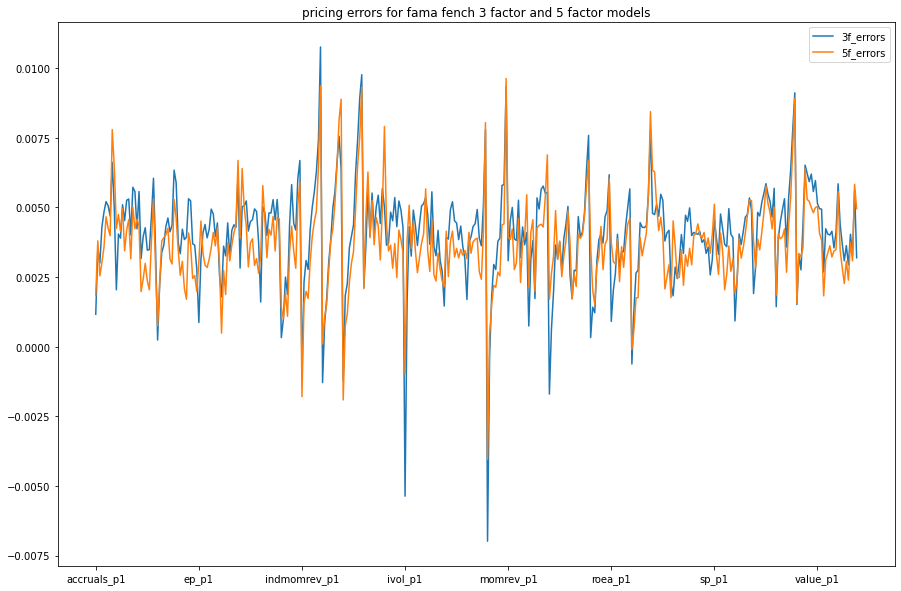

In [376]:
pricing_errors_3f =[]
pricing_errors_5f =[]

model_3f = []
model_5f = []

for i in range(dset.shape[1]):
    ff3f_regr = sm.OLS(dset.iloc[:,i].values,sm.add_constant(famafench_3f.values)).fit()
    ff5f_regr = sm.OLS(dset.iloc[:,i].values,sm.add_constant(famafench_5f.values)).fit()
    model_3f.append(ff3f_regr)
    model_5f.append(ff5f_regr)
    pricing_errors_3f.append(ff3f_regr.params[0])
    pricing_errors_5f.append(ff5f_regr.params[0])
    
pricing_errors = pd.DataFrame({'3f_errors':pricing_errors_3f,'5f_errors':pricing_errors_5f},index=dset.columns)

pricing_errors.plot(figsize=[15,10],title = 'pricing errors for fama fench 3 factor and 5 factor models')


In [377]:
# 3-factor model GRS test
T, N = famafench_3f.shape
a = pricing_errors.iloc[:, 0].values
cov = np.cov(np.array([model_3f[i].resid for i in range(len(model_3f))]))
sr_m = np.mean(famafench_3f['Mkt-RF']) / np.std(famafench_3f['Mkt-RF'])
grs = T * (a @ np.linalg.inv(cov) @ a) / (1 + sr_m**2)
grs_p_val = 1 - chi2.cdf(grs, N)
print(f"GRS statistic for 3 factor model is {grs} with p-value of {grs_p_val}")

GRS statistic for 3 factor model is 4989.945087182383 with p-value of 0.0


In [378]:
# 3-factor model GRS test
T, N = famafench_5f.shape
a = pricing_errors.iloc[:, 1].values
cov = np.cov(np.array([model_5f[i].resid for i in range(len(model_5f))]))
sr_m = np.mean(famafench_5f['Mkt-RF']) / np.std(famafench_5f['Mkt-RF'])
grs = T * (a @ np.linalg.inv(cov) @ a) / (1 + sr_m**2)
grs_p_val = 1 - chi2.cdf(grs, N)
print(f"GRS statistic for 5 factor model is {grs} with p-value of {grs_p_val}")

GRS statistic for 5 factor model is 4970.798478290522 with p-value of 0.0


The pricing errors seem to hover around the 0.04 mark, this is significant considering the range of means for excess returns is between 0.0022 to 0.0167. 

Further, the GLS test results show that the priicng errors are statstically significant and jointly different from 0. 

Hence, we conclude that teh Fama Fench 3 & 5 factor models do not adequately fit the data well.

### Part (3)

In [379]:
cov_matrix=np.cov(dset.values.T)
cov_matrix_eig_vals, cov_matrix_eig_vecs = np.linalg.eig(cov_matrix)

sorted_eig_vals_cov = cov_matrix_eig_vals[np.argsort(cov_matrix_eig_vals)[::-1]]
sorted_explained_cov = sorted_eig_vals_cov/np.sum(sorted_eig_vals_cov)
sorted_eig_vecs_covar = cov_matrix_eig_vecs[:, np.argsort(cov_matrix_eig_vals)[::-1]]

# Principal Components
covariance_pc = np.dot(dset.values, sorted_eig_vecs_covar)

# Variance of Principal Components
covariance_pc_var = np.var(covariance_pc, axis=0)

# Eigenvalues and eigenvectors of the correlation matrix
corr_matrix=np.corrcoef(dset.values.T)
corr_matrix_eig_vals, corr_matrix_eig_vecs = np.linalg.eig(corr_matrix)

sorted_eig_vals_corr = corr_matrix_eig_vals[np.argsort(corr_matrix_eig_vals)[::-1]]
sorted_explained_corr = sorted_eig_vals_corr/np.sum(sorted_eig_vals_corr)
sorted_eig_vecs_corr = corr_matrix_eig_vecs[:, np.argsort(corr_matrix_eig_vals)[::-1]]

# Principal Components
corr_pc = np.dot(dset.values, sorted_eig_vecs_corr)
# Variance of Principal Components
corr_pc_var = np.var(corr_pc, axis=0)


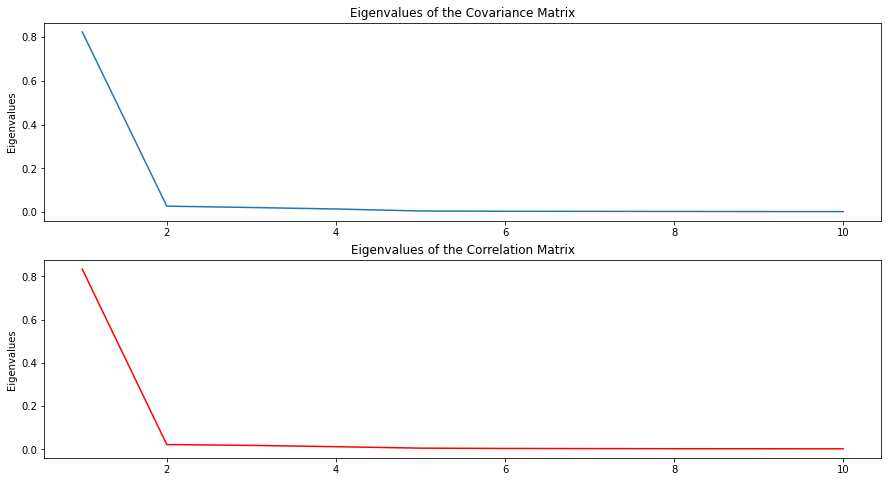

In [380]:
fig, axs = plt.subplots(2, figsize=(15, 8))
axs[0].plot(np.arange(1, 11), sorted_explained_cov[:10])
axs[0].set_title('Eigenvalues of the Covariance Matrix')
axs[0].set_ylabel('Eigenvalues')
axs[1].plot(np.arange(1, 11), sorted_explained_corr[:10], color='red')
axs[1].set_title('Eigenvalues of the Correlation Matrix')
axs[1].set_ylabel('Eigenvalues')
plt.show()

Hence, Scree Plot suggests that the first principal component describes the most variation in dataset. We arrive at the same conclusion by both covariance and correlation matrix.

### Part (4)

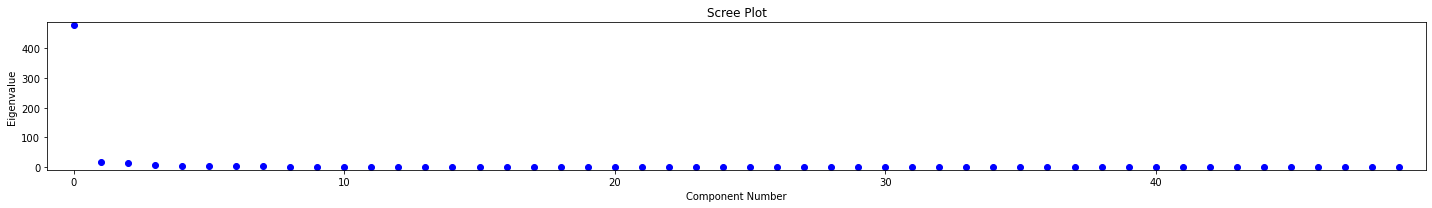

In [381]:
pca = PCA(dset, method='eig', standardize=False)
pca.plot_scree(ncomp=50, log_scale=False)
plt.show()

The overall shape of the Scree Plot is same by using the PCA plot as well.

### Part (5)

In [382]:
var_percentage = np.cumsum(pca.eigenvals) / np.sum(pca.eigenvals)

print(f"In order to reach 90% explained variance, we need {var_percentage.loc[var_percentage > 0.9].index[0]} principal components.")
print(f"In order to reach 95% explained variance, we need {var_percentage.loc[var_percentage > 0.95].index[0]} principal components.")



In order to reach 90% explained variance, we need 6 principal components.
In order to reach 95% explained variance, we need 46 principal components.


To capture more than 90% of the variance in data, we need around 6 principal components

<Figure size 1080x432 with 0 Axes>

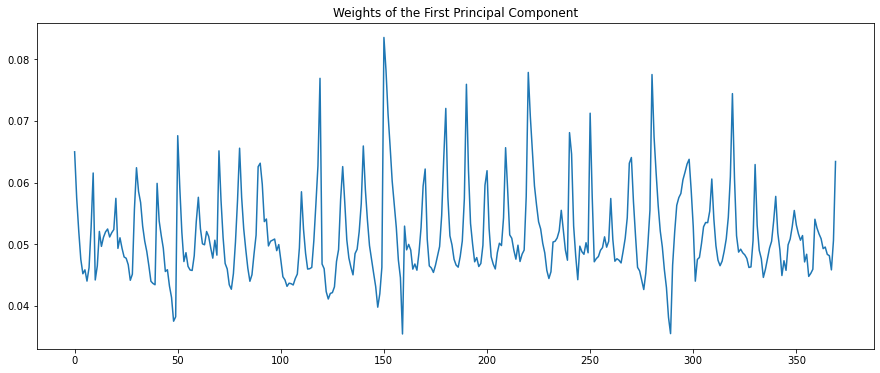

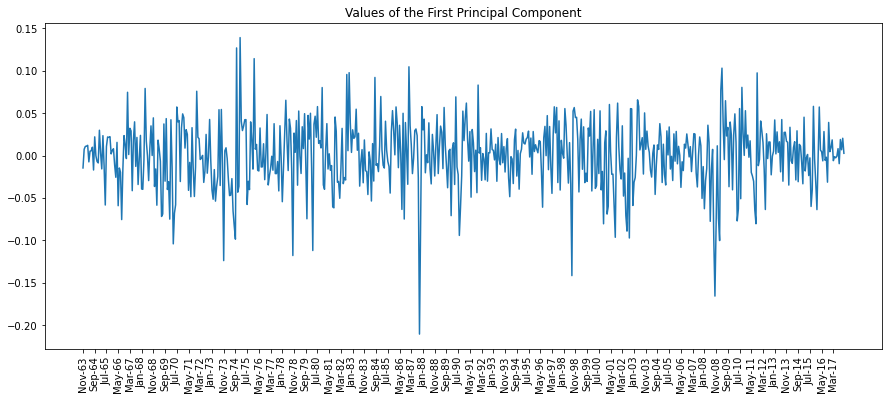

In [383]:
#plt.rcParams["figure.figsize"] = (20,3)
plt.figure(figsize=(15,6))
plt.figure(figsize=(15,6))
plt.plot(pca.eigenvecs.iloc[:, 0])
plt.title('Weights of the First Principal Component')
plt.show()

plt.figure(figsize=(15,6))
plt.plot(pca.factors.iloc[:, 0])
plt.xticks(dset.index[::10], rotation='vertical')
plt.title('Values of the First Principal Component')
plt.show()

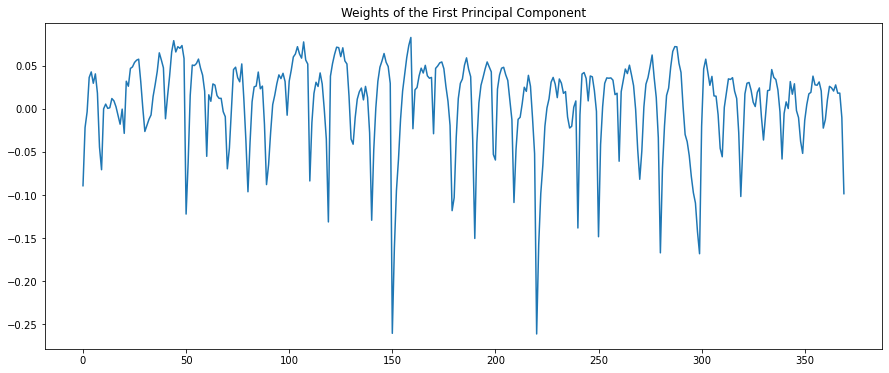

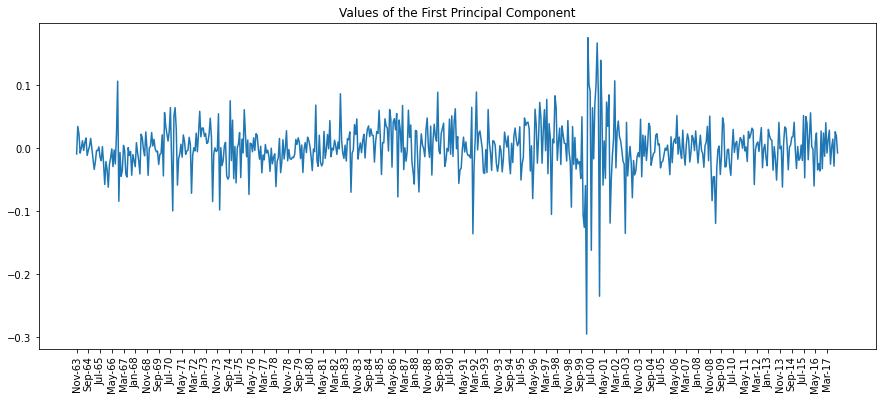

In [384]:
plt.figure(figsize=(15,6))
plt.plot(pca.eigenvecs.iloc[:, 1])
plt.title('Weights of the First Principal Component')
plt.show()

plt.figure(figsize=(15,6))
plt.plot(pca.factors.iloc[:, 1])
plt.xticks(dset.index[::10], rotation='vertical')
plt.title('Values of the First Principal Component')
plt.show()

In [385]:
pca.eigenvecs

,eigenvec_000,eigenvec_001,eigenvec_002,eigenvec_003,eigenvec_004,eigenvec_005,eigenvec_006,eigenvec_007,eigenvec_008,eigenvec_009,...,eigenvec_360,eigenvec_361,eigenvec_362,eigenvec_363,eigenvec_364,eigenvec_365,eigenvec_366,eigenvec_367,eigenvec_368,eigenvec_369
0,0.064989,-0.089320,-0.053633,0.018668,-0.039198,0.071983,-0.096195,0.006993,-0.012848,0.089326,...,-0.048754,0.027154,0.021991,-0.038621,-0.008729,0.020380,-0.003789,-0.010864,0.016397,-0.017251
1,0.057515,-0.021913,-0.062383,0.015131,-0.037172,0.008113,-0.002676,0.018217,-0.009694,0.024307,...,-0.117044,0.008939,0.029615,-0.010600,0.004932,-0.000747,0.012713,0.007378,0.006318,-0.002426
2,0.052146,-0.003671,-0.038944,0.027994,-0.040920,-0.012896,-0.088379,-0.011117,0.022211,0.015473,...,-0.085128,0.006202,-0.008503,0.007290,0.008475,-0.024612,0.020836,0.008599,0.010951,0.001030
3,0.047550,0.036137,-0.029067,-0.005746,-0.038553,-0.013292,-0.037230,0.014037,0.038560,0.005735,...,-0.075078,0.006010,0.026622,-0.008366,0.004697,-0.008143,0.010151,0.016839,0.010145,-0.018763
4,0.045214,0.042569,-0.013489,0.018067,0.007236,0.018182,-0.046729,0.000553,-0.015806,-0.078354,...,-0.096934,0.011622,0.001258,0.004821,-0.020660,0.000008,0.018729,0.028388,0.018656,-0.024369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0.048355,0.027508,0.062000,-0.009791,0.102565,0.035236,-0.027724,-0.028654,-0.008006,0.039077,...,-0.020422,0.016457,0.023933,0.006051,0.045368,-0.034627,-0.042251,-0.042585,-0.015949,0.027256
366,0.048147,0.017928,0.077468,-0.001521,0.102040,-0.004232,-0.059705,-0.045126,-0.065615,0.008113,...,-0.036245,0.029820,0.029531,-0.017950,-0.009667,-0.037549,-0.022892,-0.015287,0.001468,0.012771
367,0.045842,0.018011,0.102840,0.004320,0.076713,-0.025137,-0.084169,0.015618,-0.098894,-0.006904,...,-0.008819,-0.011724,0.010336,0.011523,0.017148,-0.038394,-0.052444,-0.020367,-0.025383,0.021651
368,0.050610,-0.010308,0.147970,0.040848,0.083240,-0.058586,-0.080692,0.045984,-0.105359,-0.082466,...,0.002649,0.013854,-0.003954,0.011799,0.020583,-0.015359,-0.006514,-0.023311,-0.009859,0.012055


We see that the first principal component puts positive weights on all portfolios, this could be equivalent to the excess market return factor.

While the second principal component puts postove and negative weights on portfolios, this factor puts a premium on portfolios which have favourable performance profiles with respect to this factor (e.g., small cap companies have positive loading for small cap factor and large cap companies will have negative loading for small cap factor). The second Principal component exhibits this behaviour.

### Part (f)

<AxesSubplot:title={'center':'pricing errors for PCA 3 factor and 5 factor models'}>

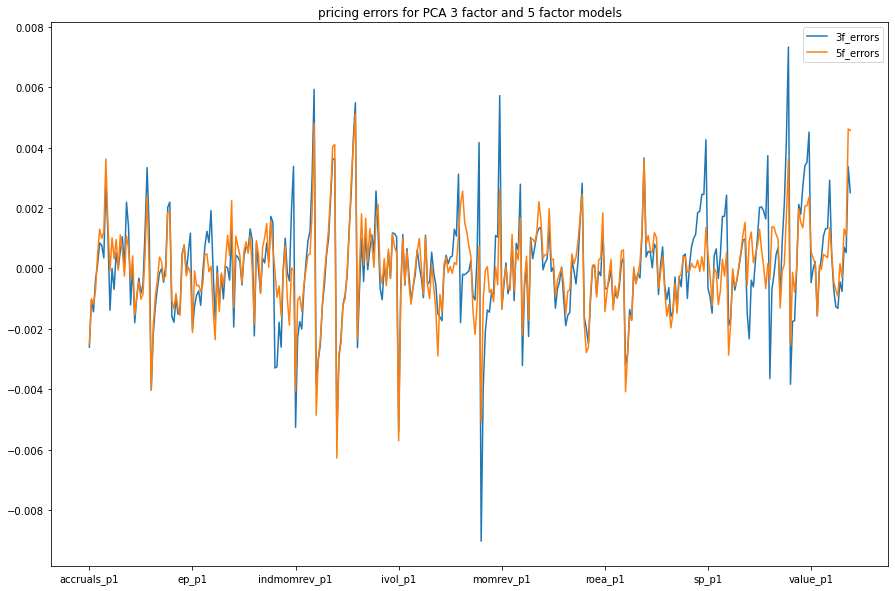

In [386]:
pricing_errors_3f_pca =[]
pricing_errors_5f_pca =[]

model_3f_pca = []
model_5f_pca = []

for i in range(dset.shape[1]):
    pca3f_regr = sm.OLS(dset.iloc[:,i].values,sm.add_constant(covariance_pc[:,:3])).fit()
    pca5f_regr = sm.OLS(dset.iloc[:,i].values,sm.add_constant(covariance_pc[:,:5])).fit()
    model_3f_pca.append(pca3f_regr)
    model_5f_pca.append(pca5f_regr)
    pricing_errors_3f_pca.append(pca3f_regr.params[0])
    pricing_errors_5f_pca.append(pca5f_regr.params[0])
    
pricing_errors_pca = pd.DataFrame({'3f_errors':pricing_errors_3f_pca,'5f_errors':pricing_errors_5f_pca},index=dset.columns)

pricing_errors_pca.plot(figsize=[15,10],title = 'pricing errors for PCA 3 factor and 5 factor models')


In [387]:
# 3-factor PCA model GRS test
T, N = covariance_pc[:,:3].shape
a = pricing_errors_pca.iloc[:, 0].values
cov = np.cov(np.array([model_3f_pca[i].resid for i in range(len(model_3f_pca))]))
sr_m = np.mean(famafench_3f['Mkt-RF']) / np.std(famafench_3f['Mkt-RF'])
grs = T * (a @ np.linalg.inv(cov) @ a) / (1 + sr_m**2)
grs_p_val = 1 - chi2.cdf(grs, N)
print(f"GRS statistic for 3 factor model is {grs} with p-value of {grs_p_val}")

GRS statistic for 3 factor model is 2444.310879073194 with p-value of 0.0


In [388]:
# 5-factor PCA model GRS test
T, N = covariance_pc[:,:5].shape
a = pricing_errors_pca.iloc[:, 0].values
cov = np.cov(np.array([model_5f_pca[i].resid for i in range(len(model_5f_pca))]))
sr_m = np.mean(famafench_5f['Mkt-RF']) / np.std(famafench_5f['Mkt-RF'])
grs = T * (a @ np.linalg.inv(cov) @ a) / (1 + sr_m**2)
grs_p_val = 1 - chi2.cdf(grs, N)
print(f"GRS statistic for 3 factor model is {grs} with p-value of {grs_p_val}")

GRS statistic for 3 factor model is 6.763876049256644e+18 with p-value of 0.0


From the plots of pricing errors, for 3-factor model above, the pricing errors are still statistically significant from zero. However, the pricing errors for many of the portfolios are hover oscillate close to zero, meaning that many portfolios are likely to be correctly priced by the 3 & 5 principal factors. 

Below we explore the usage of 6 PCs and 46 PCs (cut off required for 90% and 95% variance).

<AxesSubplot:title={'center':'pricing errors for PCA 6 factor and 46 factor models'}>

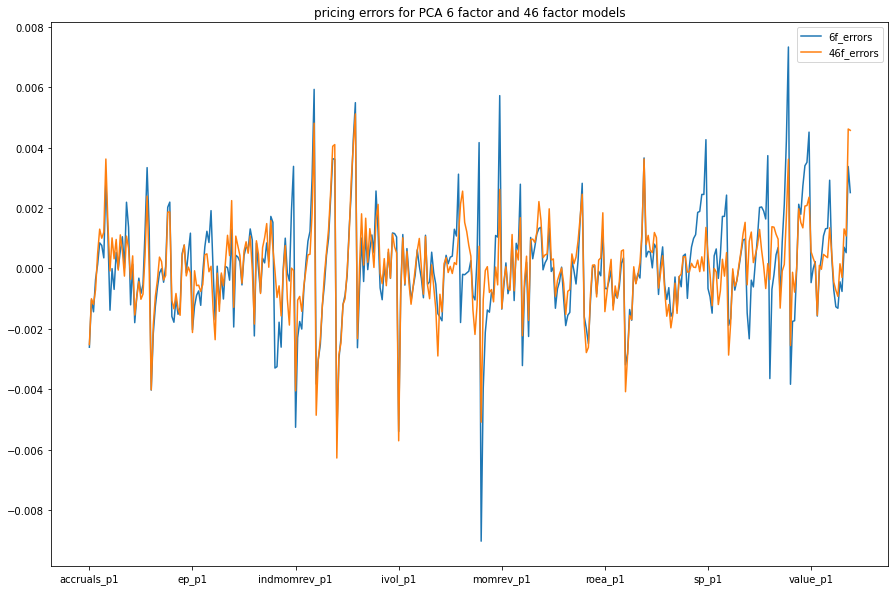

In [389]:
pricing_errors_6f_pca =[]
pricing_errors_46f_pca =[]

model_6f_pca = []
model_46f_pca = []

for i in range(dset.shape[1]):
    pca6f_regr = sm.OLS(dset.iloc[:,i].values,sm.add_constant(covariance_pc[:,:6])).fit()
    pca46f_regr = sm.OLS(dset.iloc[:,i].values,sm.add_constant(covariance_pc[:,:46])).fit()
    model_6f_pca.append(pca3f_regr)
    model_46f_pca.append(pca5f_regr)
    pricing_errors_6f_pca.append(pca3f_regr.params[0])
    pricing_errors_46f_pca.append(pca5f_regr.params[0])
    
pricing_errors_pca = pd.DataFrame({'6f_errors':pricing_errors_3f_pca,'46f_errors':pricing_errors_5f_pca},index=dset.columns)

pricing_errors_pca.plot(figsize=[15,10],title = 'pricing errors for PCA 6 factor and 46 factor models')


We do not see significant improvemeny in terms of pricing performance as pricing errors look similar to 3factor, 5factor PCS models. In addition, the 6factor and 46factor models are lot less parsimonious.